<a href="https://colab.research.google.com/github/Jayashreehv/NLP-Projects/blob/Data-Cleaning/Datacleaning_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*THIS PROJECT IS FOR DEMONSTRATING DATA CLEANING TECHNIQUES USING KAGGLE DATA SET OF BENGALURU HOURSE PREDICTION **



1.  Import necessary packages/files
2. import kaggle dataset directly to colab




In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jayashreehv","key":"99bfa6ef2a7cf9bc8c5525407e1f69a2"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           3202  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               577KB  2021-01-15 07:58:28           1975  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1731  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            465  
google/android-smartphones-high-accuracy-datasets   

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           3202  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               577KB  2021-01-15 07:58:28           1975  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1731  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            465  
google/android-smartphones-high-accuracy-datasets   

In [8]:
!kaggle datasets list -s House

ref                                                        title                                                size  lastUpdated          downloadCount  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
vikrishnan/boston-house-prices                             Boston House Prices                                  13KB  2017-08-03 17:06:12          28949  
shree1992/housedata                                        House price prediction                              432KB  2018-08-26 07:56:22          13191  
harlfoxem/housesalesprediction                             House Sales in King County, USA                     780KB  2016-08-25 15:52:49          80579  
anmolkumar/house-price-prediction-challenge                House Price Prediction Challenge                      2MB  2020-10-01 19:37:13           1322  
iarunava/happy-house-dataset                               Happy House

In [9]:
!kaggle datasets download -d amitabhajoy/bengaluru-house-price-data -p /content

  0% 0.00/195k [00:00<?, ?B/s]
100% 195k/195k [00:00<00:00, 61.6MB/s]


In [10]:
!unzip \*.zip

Archive:  bengaluru-house-price-data.zip
  inflating: Bengaluru_House_Data.csv  


In [11]:
import numpy as np
import pandas as pd

In [12]:
data=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [13]:
!ls


Bengaluru_House_Data.csv	kaggle.json
bengaluru-house-price-data.zip	sample_data


In [14]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [15]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

There are 3 float type features and remaining are either string or int type (total_sqft)

**Input Features:** area_type	availability	location	size	society	total_sqft	bath	balcony
**output feature**: price

In [16]:
data.shape

(13320, 9)

In [17]:
#data.groupby('area_type')['area_type'].agg('count')
#We need only the following features for prediction 
#location        
#size             
#total_sqft      
#bath          
#price 

In [18]:
data2=data.drop(['area_type','society','balcony','availability'],axis='columns')
data2.shape

(13320, 5)

In [19]:
data2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
#Now we are set to start data clearning process
#1. Check for Null values

In [21]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
#since the total rows in the dataset is 13k+ it doesn't hit if we drop rows which are having null values 

In [23]:
data2.shape

(13320, 5)

In [24]:
data_dropnull=data2.dropna()
data_dropnull.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [25]:
data_dropnull.shape

(13246, 5)

In [26]:
data_dropnull['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [27]:
#The size column has two different names indicating the same meaning: ex: bedroom and BHK .

Feature Engineering

In [28]:
#Let's convert size to only numbers to have unique identification
data3=data_dropnull.copy()

In [29]:
data3['bhk']=data3['size'].apply(lambda x: int(x.split(' ')[0]))


In [30]:
data3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [31]:
data3.shape

(13246, 6)

In [32]:
data3[data3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In the above table, 43 bedroom is covered in 2400 sqft house, which is practically difficult .

In [33]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In total_sqft there is a data which is in the range 1133-1384 that needs to be converted to single number, take average of the range min and max

In [34]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [35]:
data3[~data3['total_sqft'].apply(is_float)].head(5)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In the above table, there are range of values for total_sqft and few values are in float. For range of values, I take average, for float values in meters convert to sqft

In [36]:
def convert_sqft_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return(float(tokens[0])+float(tokens[1]))/2
  try:
      return float(x)
  except:
    return None

In [37]:
data4=data3.copy()
data4['total_sqft']=data4['total_sqft'].apply(convert_sqft_num)
data4=data4[data4.total_sqft.notnull()]

In [38]:
data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [39]:
data4.iloc[410]

location      Amco Colony
size                3 BHK
total_sqft           1760
bath                    3
price                  88
bhk                     3
Name: 415, dtype: object

In [40]:
df=data4.copy()

`Feature Engineering`

In [41]:
#price per sqft column is created
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [42]:
len(df.location.unique())

1298

In [43]:
df.to_csv("bhprediction.csv",index=False)

#Total location is 1304, converting by one hot encoding we will ahve 1303 features, which is dimensionality curse

In [44]:
df.location=df.location.apply(lambda x:x.strip())
#location_count=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count=df['location'].value_counts(ascending=False)
location_count

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Mudalpalaya                    1
Gandhi Nagar                   1
banashankari stage iii sa      1
Kanakapura  Rod                1
Nagarbhavi  BDA Complex        1
Name: location, Length: 1287, dtype: int64

In [45]:
len(location_count[location_count<=10])

1047

In [46]:
location_count.values.sum()

13200

In [47]:
len(location_count[location_count>10])


240

In [48]:
location_stats_less_than_10=location_count[location_count<=10]

In [49]:
len(df.location.unique())

1287

In [95]:
df.location=df.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [96]:
len(df.location.unique())

241

In [97]:
df.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [98]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Removal:
Assuming 1bhk min requirement is 300sft, removing outliers which do not satisfy this threshold

In [99]:
#whether minimum requirement of each bhk category is met or not; ex: for  a 1 bhk minimum requirement is around 300 to 500 sqft
df[df.total_sqft/df.bhk<300].head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [100]:
df.shape

(13200, 7)

In [101]:
#remove the above list
df1=df[~(df.total_sqft/df.bhk<300)]
df1.shape

(12456, 7)

In [102]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [103]:
#price like 200 per sqft is difficult to get and also max 176470 is extreme corner case
#filter out anything beyond 1 stddev from mean

In [104]:
#remove outliers
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [105]:
df2=remove_pps_outliers(df1)
df2.shape

(10242, 7)

In [106]:
import matplotlib
import matplotlib.pyplot as plt

In [107]:
def plot_scatter_chart(df,location):
  bhk2=df[(df.location==location) & (df.bhk==2)]
  bhk3=df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()


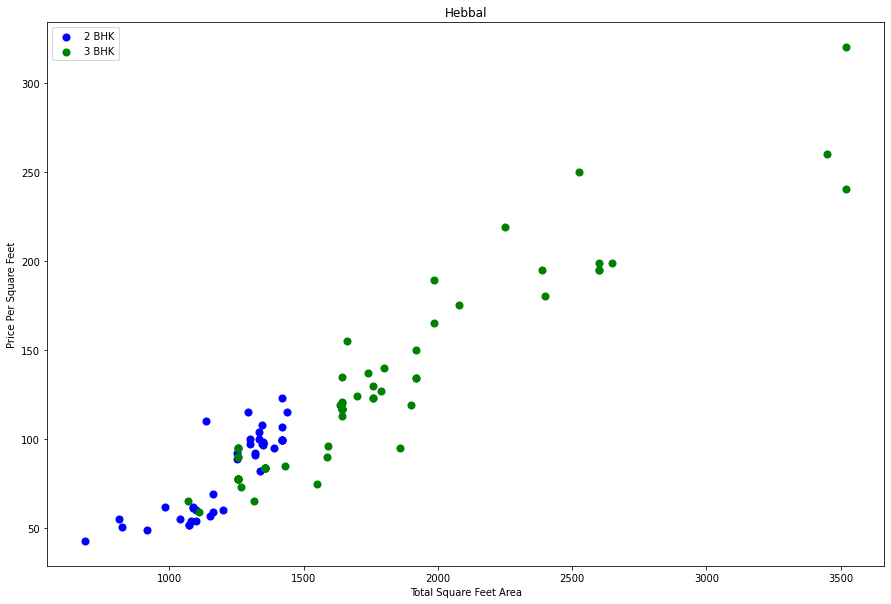

In [108]:
plot_scatter_chart(df2,'Hebbal')

In [109]:
#in the above chart it shows that for the same area 2 bhk and 3 bhk, price is more for 2 bhk compared to 3 bhk. Hence these are outliers need to be removed

In [110]:
df2.groupby('bhk')['bhk'].agg('count')

bhk
1      518
2     4756
3     4002
4      745
5      108
6       62
7       20
8       16
9        8
10       3
11       2
13       1
16       1
Name: bhk, dtype: int64

In [111]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'): # here ex: location is  Horamavu and location_df represents dataframe with all the features for Horamavu
      bhk_stats={} # create an empty dictionary to hold 
      for bhk,bhk_df in location_df.groupby('bhk'): #ex: grouped based on bhk no.. bhk holds bhk values (1,2,3,4--no of bedrooms), for each bhk category bhk_df represents dataframe with all teh feature values 
    
          bhk_stats[bhk]={  #for each bhk category, mean, std, count{total no of rows and cols in that only rows are considered as it gives count}
            'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]
      }
      for bhk,bhk_df in location_df.groupby('bhk'):
       stats=bhk_stats.get(bhk-1) #bhk-1 is to make sure for whichever bhk value ex:5 is not there in the database, stats must have null value to avoid errors
       #print(bhk_stats[bhk])
       if stats and stats['count']>5:
          exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
         # print(exclude_indices,stats)
          #print(bhk,stats)
  return df.drop(exclude_indices,axis='index')

In [112]:
df3=remove_bhk_outliers(df2)
df3.shape

(7317, 7)

In [113]:
#for i,i_loc in df3.groupby('location'):
 
 # print(i)

In [114]:
#for i,i_loc in df3.groupby('location'):
 # print(i_loc)

In [115]:
#for b,b_loc in df3.groupby('bhk'):
 # print(b)

In [116]:
#for b,b_loc in df3.groupby('bhk'):
 # print(b_loc)

In [117]:
df3[df3.bhk>=10].head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
8022,other,11 BHK,5000.0,9.0,360.0,11,7200.0
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.0
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.0
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.0


There are bathrooms more than bedrooms, which is not usual, hence removing them. Max 1 additional bathroom for guests can be considered.

In [118]:
df4=df3[df3.bath<df3.bhk+2]
df4.shape

(7239, 7)

In [119]:
bhk_stats={}
for bhk,bhk_df in df3.groupby('bhk'):
   #ex: grouped based on bhk no.. bhk holds bhk values (1,2,3,4--no of bedrooms), for each bhk category bhk_df represents dataframe with all teh feature values 
   bhk_stats[bhk]={  #for each bhk category, mean, std, count{total no of rows and cols in that only rows are considered as it gives count}
            'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]
      }
print(bhk_stats)
     

{1: {'mean': 5168.207468616613, 'std': 2059.9736418780867, 'count': 518}, 2: {'mean': 5370.617253314602, 'std': 1786.031224248717, 'count': 3628}, 3: {'mean': 6821.133676695157, 'std': 2383.864393143707, 'count': 2481}, 4: {'mean': 8417.274486198821, 'std': 2986.920287532607, 'count': 541}, 5: {'mean': 8484.610173316243, 'std': 4227.445032461211, 'count': 72}, 6: {'mean': 8381.568600279956, 'std': 4403.532252769647, 'count': 43}, 7: {'mean': 6720.433354447195, 'std': 4362.755895457345, 'count': 9}, 8: {'mean': 6240.971936833141, 'std': 3867.3884836143366, 'count': 13}, 9: {'mean': 6181.787439613528, 'std': 2622.185765804839, 'count': 5}, 10: {'mean': 7337.121212121212, 'std': 4456.867179946895, 'count': 3}, 11: {'mean': 4850.0, 'std': 2350.0, 'count': 2}, 13: {'mean': 5069.124423963133, 'std': 0.0, 'count': 1}, 16: {'mean': 5500.0, 'std': 0.0, 'count': 1}}


In [120]:
 for bhk,bhk_df in df4.groupby('bhk'):
       stats=bhk_stats.get(bhk-1)
       print(stats)

None
{'mean': 5168.207468616613, 'std': 2059.9736418780867, 'count': 518}
{'mean': 5370.617253314602, 'std': 1786.031224248717, 'count': 3628}
{'mean': 6821.133676695157, 'std': 2383.864393143707, 'count': 2481}
{'mean': 8417.274486198821, 'std': 2986.920287532607, 'count': 541}
{'mean': 8484.610173316243, 'std': 4227.445032461211, 'count': 72}
{'mean': 8381.568600279956, 'std': 4403.532252769647, 'count': 43}
{'mean': 6720.433354447195, 'std': 4362.755895457345, 'count': 9}
{'mean': 6240.971936833141, 'std': 3867.3884836143366, 'count': 13}
{'mean': 6181.787439613528, 'std': 2622.185765804839, 'count': 5}
{'mean': 7337.121212121212, 'std': 4456.867179946895, 'count': 3}
None
None


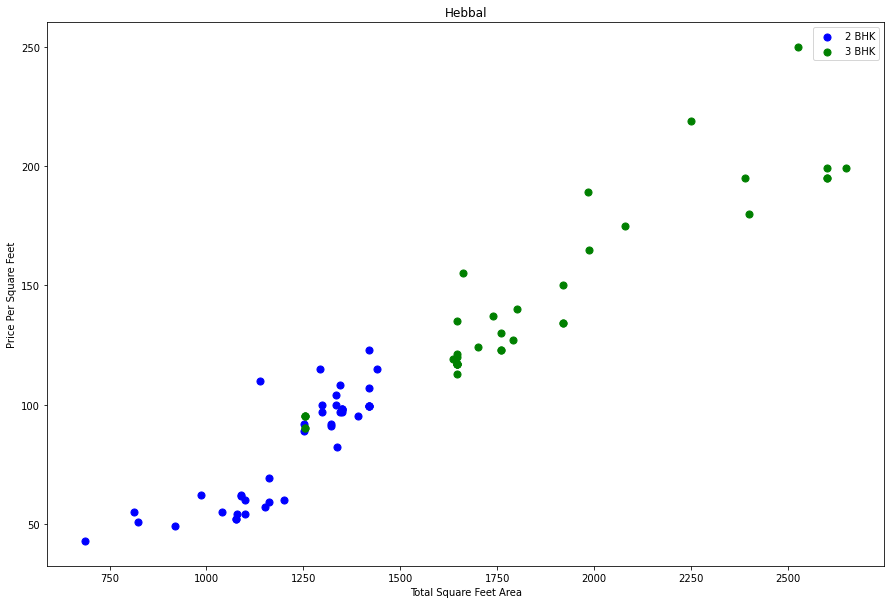

In [121]:
plot_scatter_chart(df4,"Hebbal")


In [122]:
df4.shape

(7239, 7)

Text(0, 0.5, 'Count')

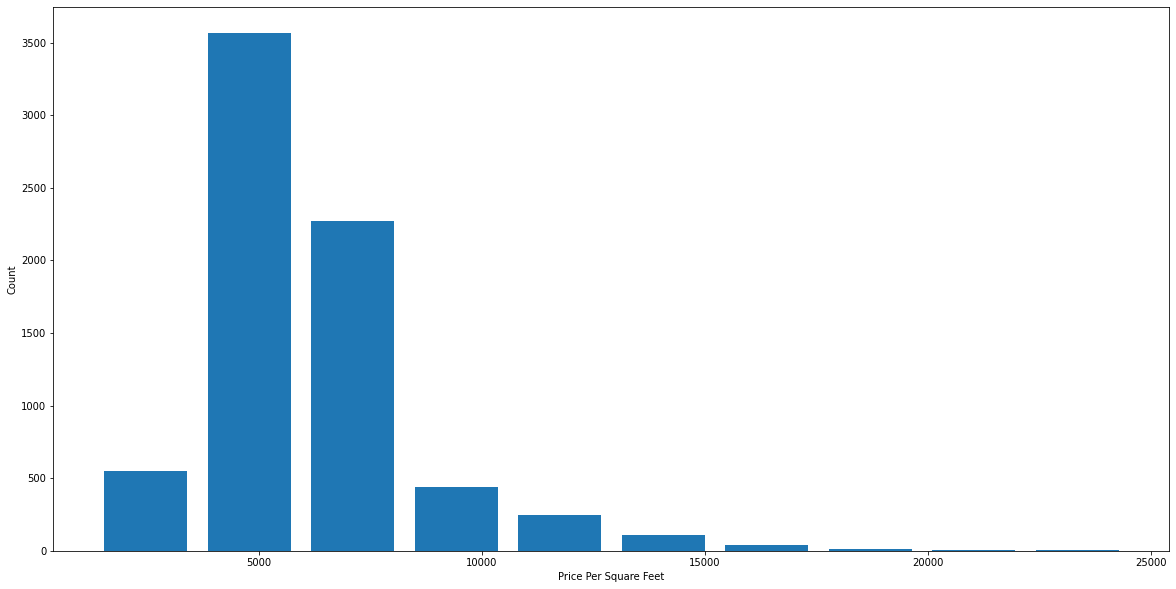

In [123]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [124]:
#Outlier removal based on Bathroom feature
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [125]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

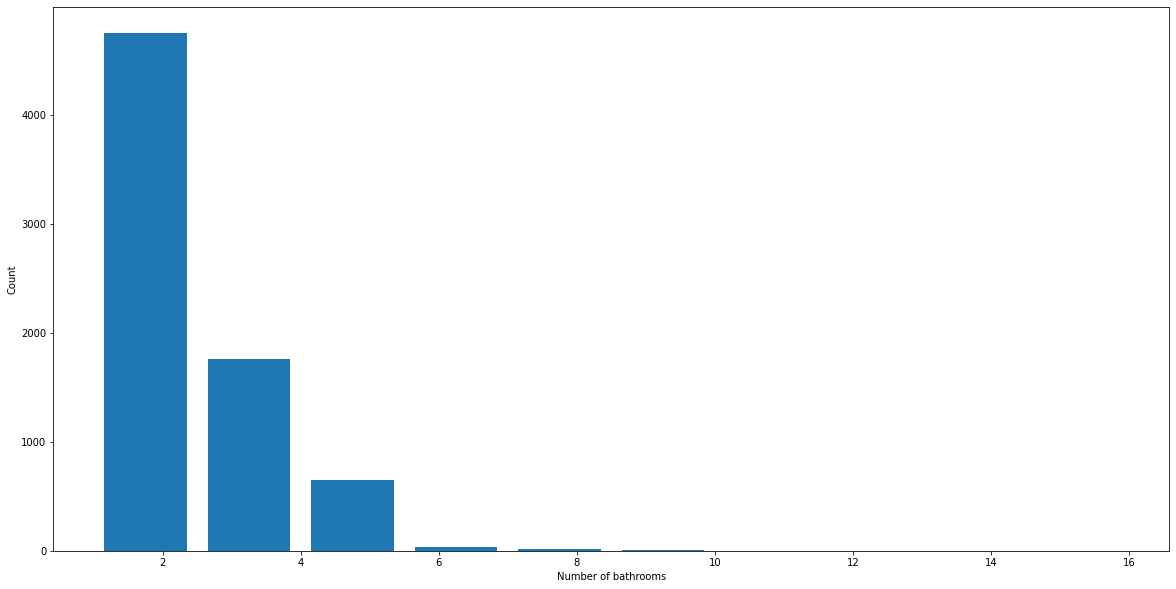

In [126]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [127]:
#Data description is self-explanatory one. Price is in Lakhs (INR)

Steps in Data Exploration and Preprocessing:

1.Identification of variables and data types
2. Analyzing the basic metrics
3. Non-Graphical Univariate Analysis
4. Graphical Univariate Analysis
5. Bivariate Analysis
6. Variable transformations
7. Missing value treatment
8. Outlier treatment
9. Correlation Analysis
10.Dimensionality Reduction








In [128]:
df5=df4.drop(['size','price_per_sqft'],axis='columns')
df5.head(3)
df5.shape

(7239, 5)

In [129]:
df5.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [130]:
# Categorical data to numeric column using one hot encoding method

In [131]:
dummies=pd.get_dummies(df5.location)

In [132]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
df6=pd.concat([ df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
df7=df6.drop('location',axis='columns')
df7.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
df7.shape

(7239, 244)

In [136]:
X=df7.drop('price',axis='columns')
y=df7.price

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8629132245229443

Use K Fold Cross Validation to measure accuracy of our LinearRegression model

In [140]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cross_val=ShuffleSplit(n_splits=7,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cross_val)

array([0.86291322, 0.85632943, 0.87669838, 0.80558377, 0.79969281,
       0.84376698, 0.84889945])

All the iterations give better score ie above 80.

In [141]:
#Finding Best model using GridSearchCV

In [142]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [143]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cross_val, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.841983,{'normalize': True}
1,lasso,0.712316,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743649,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


From the above search, linear regression gives the best score, hence can go with the same

In [144]:
#Testing the model

In [145]:
def predict_price_bhk_location(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>=0:
    x[loc_index]=1
  return lr.predict([x])[0]

In [146]:
predict_price_bhk_location("Hebbal",1000,1,2)

66.63098223419617

In [147]:
predict_price_bhk_location("Raja Rajeshwari Nagar",1000,2,2)

30.897595870252985

In [148]:
#Export the tested model to piclle file
import pickle
with open('Bangalore_home_price_prediction_model.pickle','wb')as f:
  pickle.dump(lr,f)

In [150]:
#Export location and column information to  a  file that will be useful for prediciton application
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}


In [151]:
with open("columns.json","w")as f:
  json.dump(columns,f)
  #f.write(json.dump(columns))